In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns

/Users/triddle/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def transitions(x,y,o,iw):
    """for a given essay, return the probability shifts for each word
    this has been adjusted to just return probabilities sequentially,
    instead of adding all probabilities from the same word"""
    worddeltas=[]
    endpoint = o.shape[0]
    startpoint = endpoint-np.count_nonzero(x)
    initval=o[startpoint-1]
    words = []
    probs = np.empty((0,4))
    for i in range(startpoint,endpoint):
        deltacuzofx=np.subtract(o[i],initval)
        words.append(iw[x[i]])
        probs = np.append(probs, deltacuzofx.reshape(1,4), axis=0)
        #if word in worddeltas:
        #    worddeltas[word]=worddeltas[word]+deltacuzofx
        #else:
        #    worddeltas[word]=deltacuzofx
        initval=o[i]
    return (words, probs)

In [3]:
def addtransitions(x,y,o,iw):
    """for each essay, get the transitions associated with each word
    return a dictionary of word transitions summed across the corpus"""
    addworddeltas={}
    for i in range(x.shape[0]):
        wd=transitions(x[i],y[i],o[i],iw)
        for key, value in wd.iteritems():
            if key in addworddeltas:
                addworddeltas[key]=addworddeltas[key]+value
            else:
                addworddeltas[key]=value
    return addworddeltas

In [4]:
def filtertestdata(x,y,o,t,pos):
    t=np.asarray(t)
    ynew=y[(y[:,pos]==1)]
    xnew=x[(y[:,pos]==1)]
    onew=o[(y[:,pos]==1)]
    tnew=t[(y[:,pos]==1)]
    return xnew,ynew,onew,tnew.tolist()

In [5]:
def filterdictionary(d,pos):
    newdic={}
    values=[]
    words=[]
    for key, value in d.iteritems():
        words.append(key)
        values.append(value[pos])
    words=[x for (y,x) in sorted(zip(values,words))]
    values=[y for (y,x) in sorted(zip(values,words))]
    newdic = dict(zip(words, values))
    return words,values,newdic
    

In [2]:
# main function - Values(-1-ALL, 0-control male, 1-control female, 2-affirmation male, 3-affirmation female)
from __future__ import division
import numpy as np
index_word=np.load('Data/finalgenderdict.npy').item()
word_index=np.load('Data/finalgenderdictinv.npy').item()
testdata_output=np.load('Data/finalgendertestoutput.npy')
testdata_x=np.load('Data/finalgenderxtestdata.npy')
testdata_y=np.load('Data/finalgenderytestdata.npy')
with open('Data/finalgendertextsinput.txt') as f:
    text_content = f.readlines()
filtertestdatavalue=-1
filterdictionaryvalue=1
if filtertestdatavalue!=-1:
    testdata_x,testdata_y,testdata_output,text_content=filtertestdata(testdata_x,testdata_y,testdata_output,text_content,filtertestdatavalue)
maxindexoutput=np.argmax(testdata_output[:,-1,:],axis=1)
maxindexyval=np.argmax(testdata_y,axis=1)
accuracy=(np.count_nonzero(maxindexoutput == maxindexyval)/maxindexyval.shape[0])*100
#addwd=addtransitions(testdata_x,testdata_y,testdata_output,index_word)
#words,values,dic=filterdictionary(addwd,filterdictionaryvalue)
accuracy

58.8

In [9]:
#maxindexoutput
#testdata_x
testdata_output.shape

(500, 208, 4)

In [11]:
wd=transitions(testdata_x[0],testdata_y[0],testdata_output[0],index_word)

- index_word is pairing of index numbers with words
- word_index is the pairing of words with index numbers
- testdata_output is the sequential probabilities for each of the 500 test essays
- testdata_x is a matrix of index_word values (i.e. tells you what word is in the essay
- testdata_y is a matrix that indicates the class for each essay
- accuracy is not scored in the same manner as essay classification (f1 score)

First, 

In [30]:
words=[]
essay=[]
probs = np.empty((0,4))
for i in range(0, len(testdata_x)):
    word_dists = transitions(testdata_x[i],testdata_y[i],testdata_output[i],index_word)
    words.append(word_dists[0])
    essay.append([i]*len(word_dists[0]))
    probs = np.append(probs, word_dists[1], axis=0)
df1 = pd.DataFrame({'feature': [w for e in words for w in e],
                    'prob': probs[:,0],
                    'class': ['control_m']*len(probs),
                    'essay_num': [w for e in essay for w in e]})
df2 = pd.DataFrame({'feature': [w for e in words for w in e],
                    'prob': probs[:,1],
                    'class': ['control_f']*len(probs),
                    'essay_num': [w for e in essay for w in e]})
df3 = pd.DataFrame({'feature': [w for e in words for w in e],
                    'prob': probs[:,2],
                    'class': ['aff_m']*len(probs),
                    'essay_num': [w for e in essay for w in e]})
df4 = pd.DataFrame({'feature': [w for e in words for w in e],
                    'prob': probs[:,3],
                    'class': ['aff_f']*len(probs),
                    'essay_num': [w for e in essay for w in e]})
df = pd.concat([df1,df2,df3,df4])
df.to_csv('output/nn_probs.csv', index=False, encoding='utf-8')

In [1]:
len(testdata_output)

NameError: name 'testdata_output' is not defined

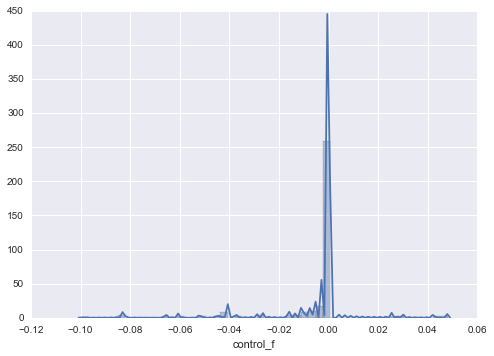

In [217]:
sns.distplot(df.control_f[df.words=='friends'])

In [208]:
df.words.value_counts()

i                 1168
to                1154
and                707
my                 486
a                  469
important          448
be                 435
the                429
because            424
me                 397
is                 371
it                 263
in                 247
of                 227
have               216
they               206
that               205
good               200
get                199
at                 198
are                194
family             191
or                 188
like               187
for                179
when               175
with               174
friends            171
you                167
would              164
                  ... 
clarinet             1
indian               1
ill                  1
viola                1
video                1
exercise             1
3d                   1
transportation       1
degree               1
grandparents         1
makeup               1
fullana              1
cost       